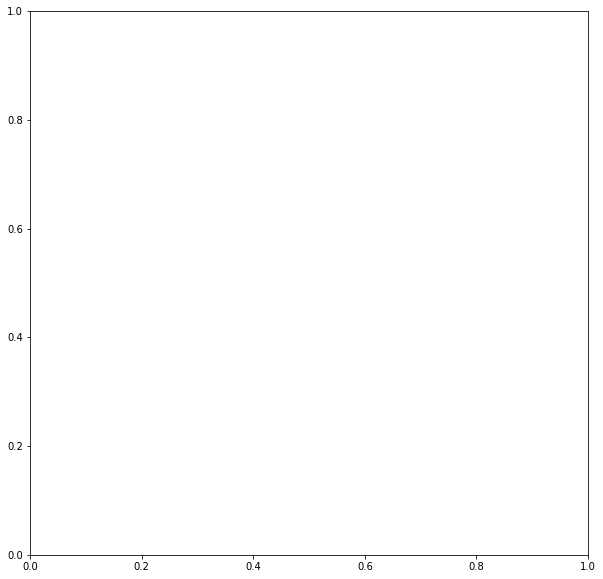

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import scipy.stats
import matplotlib.pyplot as plt
from research_module import *
from point import Point
from plot import*


# fig, ax = plt.subplots(2, figsize=(4,7))
connect_distance = 1
fig, ax = plt.subplots(figsize=(10,10))

# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Preparing the poisson distribution pibts
# Simulation window parameters
xMin = 0
xMax = 20
yMin = 0
yMax = 20
xDelta = xMax-xMin
yDelta = yMax-yMin  # rectangle dimensions
areaTotal = xDelta*yDelta

lambda0 = 2
numbPoints = (scipy.stats.poisson(lambda0*areaTotal).rvs())
x = np.load('x.npy', allow_pickle=True)
y = np.load('y.npy', allow_pickle=True)
numbPoints = len(x)

In [39]:
array_of_points = []

for i in range(numbPoints):
    """
    The last index of the point object indecates the state of the point:
    0: Firewall
    1: Normal 
    2: Protected --> protects itself and it's edges (not a firewall) <---- this is used in the second approach of firewalls
    -----------------------------------
    Initially we'll initilize the poitns with no groups
    """
    array_of_points.append(Point(None, i, x[i], y[i], 1, 0)
                           )


len(array_of_points)

388

In [40]:
edge_matrix = form_edge_matrix(array_of_points, connect_distance)


In [41]:
desired_number_of_firewalls = 30
min_points_per_cluster = 20

In [42]:
possible_number_of_clusters = [i for i in range(
    2, int(numbPoints/min_points_per_cluster))]

In [43]:
%reload_ext autoreload
high = len(possible_number_of_clusters)-1
low = 0

cluster_to_firewalls_buffer = []
array_of_groups = []
groups_ = []

while low <= high:

    #select the candidate clusters for bisection
    mid = int((low+high)/2)
    candidate_number_of_clusters = possible_number_of_clusters[mid]

    #-----------------------------------------------------------------------------------------
    #set up the the groups so we can find the firewalls required
    groups_ = divide_even_clusters(x, y, candidate_number_of_clusters)

    for i in range(numbPoints):
        array_of_points[i].group = groups_[i]

    # we prepare the array that holds all the groups with their points
    array_of_groups = get_cluster_points(
        candidate_number_of_clusters, array_of_points)

    for group in array_of_groups:
        group.find_connected_groups()
    #-----------------------------------------------------------------------------------------

    #start multiway partitioning
    i = 0
    while i < candidate_number_of_clusters:
        print(f'df{i}')
        startAgain = False
        for group in array_of_groups[i].connectedGroup:
            indicator = two_way_partitioning_enhanced(
                array_of_groups[i], array_of_groups[group], groups_)
            if indicator > 0:
                startAgain = True
                array_of_groups[i].find_connected_groups()
                array_of_groups[group].find_connected_groups()
        i = 0 if startAgain else i + 1

    #update the current graph formulation
    for group in array_of_groups:
        group.find_connected_groups()

    #start oneway partitioning
    i = 0
    while i < candidate_number_of_clusters:
        print(f'd{i}')
        startAgain = False
        for group in array_of_groups[i].connectedGroup:
            indicator = one_way_partioning_enhanced(
                array_of_groups[i], array_of_groups[group], groups_, numbPoints/candidate_number_of_clusters, 0.1)
            if indicator > 0:
                array_of_groups[i].find_connected_groups()
                array_of_groups[group].find_connected_groups()
                startAgain = True
        i = 0 if startAgain else i + 1

    for group in array_of_groups:
        group.find_connected_groups()
    
    firewalls, edges = find_firewalls(array_of_groups, protect='self')
    cluster_to_firewalls_buffer.append(
        (f'clusters: {candidate_number_of_clusters}', f'firewalls: {len(firewalls)}'))

    # binary tree updates
    if len(firewalls) >= desired_number_of_firewalls:
        high = mid - 1
    else:
        low = mid + 1

df0
df0
df0
df1
df0
df1
df2
df3
df4
df5
df0
df1
df2
df3
df4
df0
df1
df2
df3
df4
df5
df6
df7
df0
df1
df2
df3
df4
df5
df6
df7
df0
df1
df2
df3
df4
df5
df6
df7
df8
df9
d0
d0
d1
d0
d1
d2
d0
d1
d2
d0
d1
d2
d3
d4
d0
d1
d2
d3
d4
d5
d6
d0
d1
d2
d3
d4
d5
d6
d7
d0
d0
d1
d2
d3
d4
d5
d6
d7
d0
d0
d1
d2
d3
d4
d5
d6
d7
d0
d0
d1
d2
d3
d4
d5
d6
d7
d0
d0
d1
d2
d3
d4
d5
d6
d7
d0
d0
d1
d2
d0
d0
d0
d1
d2
d3
d4
d5
d6
d7
d8
d9
d0
d1
d2
d0
d1
d2
d3
d0
d1
d2
d3
d4
d5
d6
d7
d8
d9
d0
d1
d2
d3
d0
d1
d2
d3
d4
d5
d6
d7
d8
d9
d0
d1
d2
d3
d0
d1
d2
d3
d4
d5
d6
d7
d8
d9
d0
d1
d2
d3
d0
d1
d2
d3
d4
d5
d6
d7
d8
d9
d0
d1
d2
d3
d0
d1
d2
d3
d4
d5
d6
d7
d8
d9
d0
d1
d2
d3
d0
d1
d2
d3
d4
d5
d6
d7
d8
d9
d0
d1
d2
d3
d0
d1
d2
d3
d4
d5
d6
d7
d8
d9
d0
d1
d2
d3
d0
d1
d2
d3
d4
d5
d6
d7
d8
d9
d0
d1
d2
d3
d0
d1
d2
d3
d4
d5
d6
d7
d8
d9
d0
d1
d2
d3
d0
d1
d2
d3
d4
d5
d6
d7
d8
d9
d0
d1
d2
d3
d0
d1
d2
d3
d4
d5
d6
d7
d8
d9
d0
d1
d2
d3
d0
d1
d2
d3
d4
d5
d6
d7
d8
d9
d0
d1
d2
d3
d0
d1
d2
d3
d4
d5
d6
d7
d8
d9
d0
d1
d2
d3
d0
d1
d2
d3
d4
d5
d6
d7
d8

KeyboardInterrupt: 

[('clusters: 10', 'firewalls: 7'), ('clusters: 14', 'firewalls: 10'), ('clusters: 16', 'firewalls: 13'), ('clusters: 17', 'firewalls: 11'), ('clusters: 18', 'firewalls: 22')]
{(7, 8), (8, 10), (7, 8)}
group_name: 0, #points, 19 dif_ori_cut: 2, connected_groups {11, 5, 6, 15}
group_name: 1, #points, 23 dif_ori_cut: -2, connected_groups {16, 15}
group_name: 2, #points, 23 dif_ori_cut: -2, connected_groups {8, 13, 15}
group_name: 3, #points, 22 dif_ori_cut: -1, connected_groups {17, 12}
group_name: 4, #points, 19 dif_ori_cut: 2, connected_groups set()
group_name: 5, #points, 23 dif_ori_cut: -2, connected_groups {0}
group_name: 6, #points, 23 dif_ori_cut: -2, connected_groups {0, 17}
group_name: 7, #points, 19 dif_ori_cut: 2, connected_groups {13}
group_name: 8, #points, 23 dif_ori_cut: -2, connected_groups {2, 13}
group_name: 9, #points, 22 dif_ori_cut: -1, connected_groups {16}
group_name: 10, #points, 21 dif_ori_cut: 0, connected_groups {17}
group_name: 11, #points, 20 dif_ori_cut: 1, c

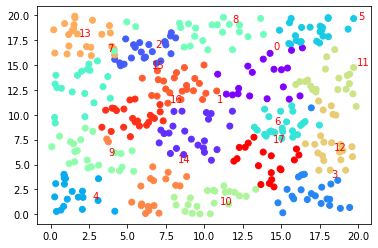

In [ ]:
ax.clear()

plot_points(ax, x, y, groups_, array_of_groups)
# plot_edges(a/x, array_of_groups)
# plot_firewalls(ax, array_of_groups, protect='self')
print(cluster_to_firewalls_buffer)

for group in array_of_groups:
    if group.name == 1:
        print(group.outerPoints)


for group in array_of_groups:
    x_ = list(group.points)[1].x
    y_ = list(group.points)[1].y
    print('group_name: {}, #points, {} dif_ori_cut: {}, connected_groups {}'.format(group.name, len(group.points), (int(numbPoints /
          int(cluster_to_firewalls_buffer[-1][0].split(':')[1])) - len(group.points)), (group.connectedGroup)))
    ax.annotate(f'{group.name}', xy=(x_, y_), color='red',
                 xytext=(10, 10), textcoords="offset points")

print(numbPoints, int(int(numbPoints/int(cluster_to_firewalls_buffer[-1][0].split(':')[1]))*1.1),
      int((numbPoints/int(cluster_to_firewalls_buffer[-1][0].split(':')[1]))*0.9))

fig